In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("data/glass.csv")
df.shape

(214, 10)

In [4]:
X = df.drop("Type", axis = 1)
y = df["Type"]

In [5]:
X.shape

(214, 9)

In [6]:
y.shape

(214,)

In [7]:
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


___
## AdaBoost Classifier

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((160, 9), (160,), (54, 9), (54,))

In [9]:
AB = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators = 300 )
AB.fit(X_train, y_train)
predictions = AB.predict(X_test)

In [10]:
correct = 0
incorrect = 0
for prediction, truth in zip(predictions, y_test):
    if prediction == truth:
        correct += 1
    elif prediction != truth:
        incorrect += 1
    else:
        print ("Evaluating performance for processed predictions:")
        break

In [11]:
print("correct:",correct)
print("incorrect:",incorrect)
print("accuracy score:", AB.score(X_test, y_test))

correct: 38
incorrect: 16
accuracy score: 0.7037037037037037


In [19]:
y_pred = AB.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[13  1  0  0  0  0]
 [ 5 11  3  1  1  0]
 [ 2  1  1  0  0  0]
 [ 0  1  0  2  1  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  8]]
0.7037037037037037


In [13]:
print('The accuracy of the AdaBoost  classifier is {:.2f} on training data'.format(AB.score(X_train, y_train)))
print('The accuracy of the AdaBoost  classifier is {:.2f} on test data'.format(AB.score(X_test, y_test)))

The accuracy of the AdaBoost  classifier is 1.00 on training data
The accuracy of the AdaBoost  classifier is 0.70 on test data


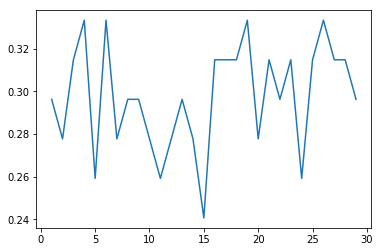

In [14]:
error=[]
for i in range (1,30):   
    AB.fit(X_train, y_train)
    y_pred = AB.predict(X_test)
    error.append(np.mean(y_pred!=y_test))
    
plt.plot(range(1,30),error)
plt.show()

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.65      0.93      0.76        14
           2       0.79      0.52      0.63        21
           3       0.25      0.25      0.25         4
           5       0.67      0.50      0.57         4
           6       0.60      1.00      0.75         3
           7       1.00      1.00      1.00         8

   micro avg       0.70      0.70      0.70        54
   macro avg       0.66      0.70      0.66        54
weighted avg       0.72      0.70      0.69        54



In [16]:
print ('Accuracy_Bagging Classifier : ', accuracy_score(y_test,y_pred)*100,'%')

Accuracy_Bagging Classifier :  70.37037037037037 %


___
## Grid Search